Problem 2) Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("D:\ExcelR_Assignments\Simple_Linear_Regression(Completed)\Datasets\Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# Checking for presence of outliers

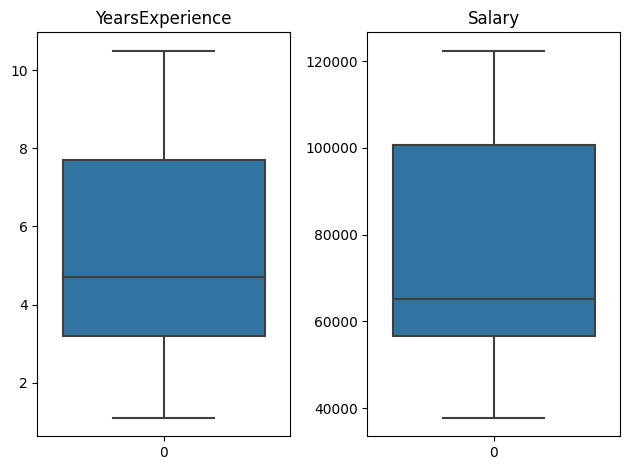

In [5]:
plt.subplot(1,2,1)
sns.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(1,2,2)
sns.boxplot(df['Salary'])
plt.title('Salary')
plt.tight_layout()

In [6]:
# Both the columns are free from outliers

In [7]:
# Checking for skewness

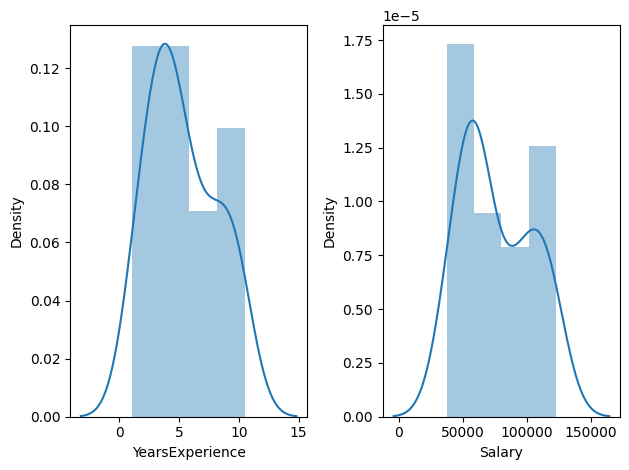

In [8]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.tight_layout()

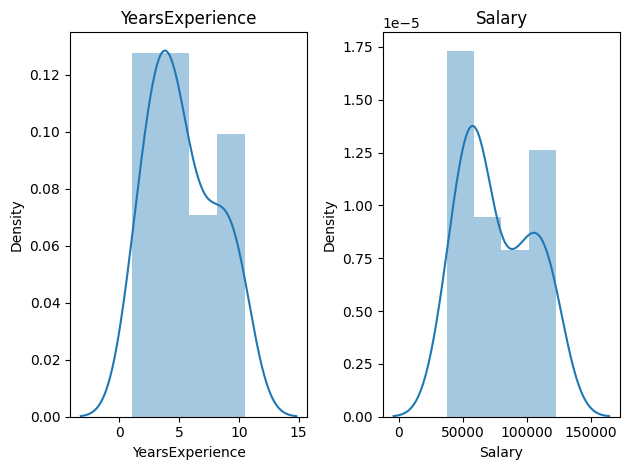

In [9]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.title('Salary')
plt.tight_layout()

In [10]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [11]:
# There is moderate skewness present in both of the columns

In [12]:
# checking for correlation betweeen columns

<Axes: xlabel='YearsExperience', ylabel='Salary'>

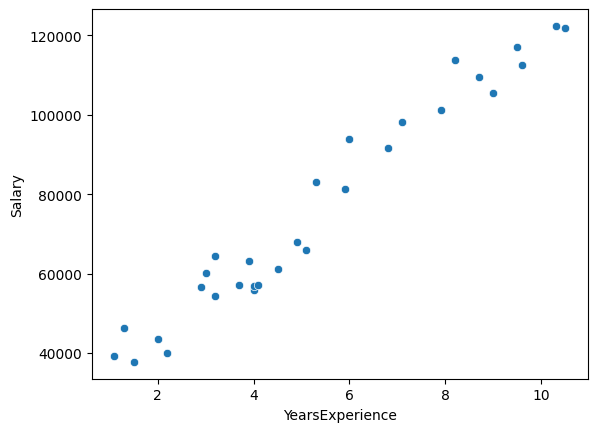

In [13]:
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

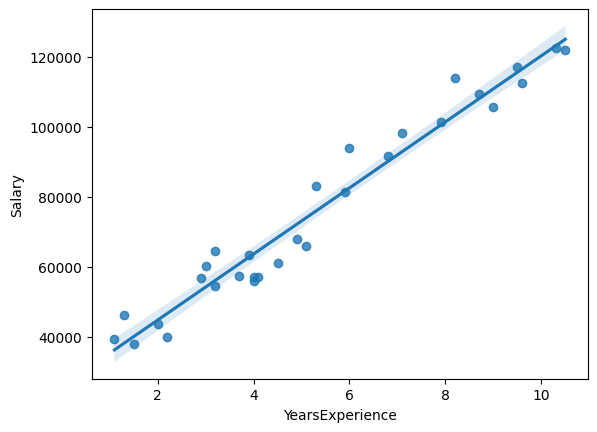

In [14]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [15]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [16]:
# There is high positive skewness present between both the columns

In [17]:
# Checking for outliers present

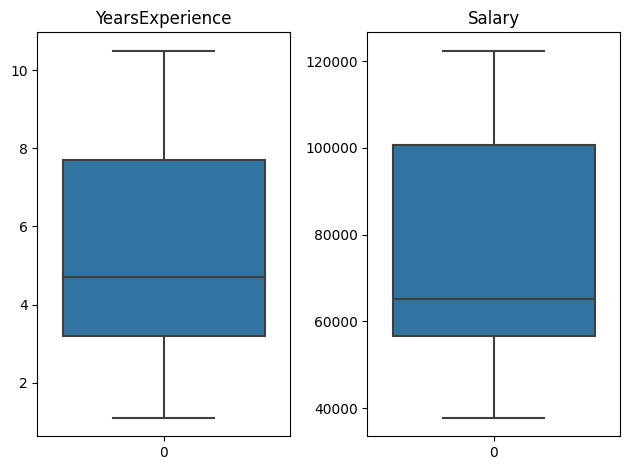

In [18]:
plt.subplot(1,2,1)
sns.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(1,2,2)
sns.boxplot(df['Salary'])
plt.title('Salary')
plt.tight_layout()

In [19]:
# No outliers are present in both the columns

In [20]:
# Model Building

In [21]:
model1 = smf.ols('Salary~YearsExperience', data=df).fit()
model1

In [22]:
# Model1 is ready
# Checking for model1 parameters and pvalues

In [23]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        18:57:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [25]:
model1.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [26]:
# here pvalue < alpha(0.05), so we are rejecting Null hypothesis. i.e. m=0

In [27]:
# calculating r2 values for checking accuracy of model

In [28]:
model1.rsquared

0.9569566641435086

In [29]:
# Here our Model1 is having 95% accuracy
# Predicting for new salaries.

In [30]:
test = pd.DataFrame({
    'YearsExperience' : [round(random.uniform(1, 15), 1) for _ in range(30)]
})
test

,YearsExperience
0,6.8
1,10.1
2,10.3
3,2.1
4,3.2
5,3.6
6,14.1
7,8.0
8,13.7
9,9.8


In [31]:
df['m1_predicted_salary'] = model1.predict(test)
df

,YearsExperience,Salary,m1_predicted_salary
0,1.1,39343.0,90051.943985
1,1.3,46205.0,121236.819645
2,1.5,37731.0,123126.812110
3,2.0,43525.0,45637.121074
4,2.2,39891.0,56032.079627
5,2.9,56642.0,59812.064556
6,3.0,60150.0,159036.668931
7,3.2,54445.0,101391.898770
8,3.2,64445.0,155256.684003
9,3.7,57189.0,118401.830949


In [32]:
# Checking MSE and RMSE values for model1

In [34]:
predicted_values = df['m1_predicted_salary']
MSE_model1 = mean_squared_error(df['Salary'], predicted_values)
RMSE_model1 = np.sqrt(MSE_model1)
print('MSE Of Model 1 = ', MSE_model1, '\nRMSE of Model 1 = ', RMSE_model1)

MSE Of Model 1 =  2315107315.7658086 
RMSE of Model 1 =  48115.56209549888


In [35]:
# Data Transformation
#1. log method

In [36]:
df['log_yearsexperience'] = np.log(df['YearsExperience'])
df['log_salary'] = np.log(df['Salary'])
df

,YearsExperience,Salary,m1_predicted_salary,log_yearsexperience,log_salary
0,1.1,39343.0,90051.943985,0.095310,10.580073
1,1.3,46205.0,121236.819645,0.262364,10.740843
2,1.5,37731.0,123126.812110,0.405465,10.538237
3,2.0,43525.0,45637.121074,0.693147,10.681091
4,2.2,39891.0,56032.079627,0.788457,10.593906
5,2.9,56642.0,59812.064556,1.064711,10.944506
6,3.0,60150.0,159036.668931,1.098612,11.004597
7,3.2,54445.0,101391.898770,1.163151,10.904946
8,3.2,64445.0,155256.684003,1.163151,11.073567
9,3.7,57189.0,118401.830949,1.308333,10.954117


In [37]:
# Checking for skewness

In [38]:
df['log_yearsexperience'].skew(), df['log_salary'].skew()

(-0.6005648582626513, -0.044126086756988495)

In [39]:
# Here both of the columns are having moderate negative skewness but having less as compared to model1
# lets build model2 using log method

In [40]:
model2 = smf.ols('log_salary~log_yearsexperience', data=df).fit()
model2

In [41]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        18:58:41   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.3280      0.056    184.868      0.000      10.214      10.442
log_yearsexperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Checking for model2 parameters and pvalues

In [43]:
model2.params

Intercept              10.328043
log_yearsexperience     0.562089
dtype: float64

In [44]:
model2.pvalues

Intercept              9.073132e-45
log_yearsexperience    7.395278e-16
dtype: float64

In [45]:
# here pvalue < alpha(0.05), so we are rejecting Null hypothesis. i.e. m=0

In [46]:
# Checking for r2 value

In [47]:
model2.rsquared

0.905215072581715

In [48]:
# Here our model2 accuracy is 90%
# predicting new salary using model2

In [49]:
test2 = pd.DataFrame({
    'log_yearsexperience' : [round(random.uniform(1, 15), 1) for _ in range(30)]
})
test2

,log_yearsexperience
0,1.9
1,9.1
2,10.5
3,5.8
4,1.7
5,12.2
6,7.5
7,3.8
8,3.8
9,10.6


In [50]:
df['m2_predicted_salary'] = model2.predict(test2)
df

,YearsExperience,Salary,m1_predicted_salary,log_yearsexperience,log_salary,m2_predicted_salary
0,1.1,39343.0,90051.943985,0.095310,10.580073,11.396012
1,1.3,46205.0,121236.819645,0.262364,10.740843,15.443052
2,1.5,37731.0,123126.812110,0.405465,10.538237,16.229976
3,2.0,43525.0,45637.121074,0.693147,10.681091,13.588158
4,2.2,39891.0,56032.079627,0.788457,10.593906,11.283594
5,2.9,56642.0,59812.064556,1.064711,10.944506,17.185527
6,3.0,60150.0,159036.668931,1.098612,11.004597,14.543709
7,3.2,54445.0,101391.898770,1.163151,10.904946,12.463981
8,3.2,64445.0,155256.684003,1.163151,11.073567,12.463981
9,3.7,57189.0,118401.830949,1.308333,10.954117,16.286185


In [ ]:
# Calculating MSE and RMSE of model2

In [51]:
predicted_values = df['m2_predicted_salary']
MSE_model2 = mean_squared_error(df['Salary'], predicted_values)
RMSE_model2 = np.sqrt(MSE_model2)
print('MSE Of Model 2 = ', MSE_model2, '\nRMSE of Model 2 = ', RMSE_model2)

MSE Of Model 2 =  6500625688.131293 
RMSE of Model 2 =  80626.4577426746


In [53]:
# Data Transformation
#2. sqrt method

In [54]:
df['sqrt_yearsexperience'] = np.sqrt(df['YearsExperience'])
df['sqrt_salary'] = np.sqrt(df['Salary'])
df

,YearsExperience,Salary,m1_predicted_salary,log_yearsexperience,log_salary,m2_predicted_salary,sqrt_yearsexperience,sqrt_salary
0,1.1,39343.0,90051.943985,0.095310,10.580073,11.396012,1.048809,198.350700
1,1.3,46205.0,121236.819645,0.262364,10.740843,15.443052,1.140175,214.953483
2,1.5,37731.0,123126.812110,0.405465,10.538237,16.229976,1.224745,194.244691
3,2.0,43525.0,45637.121074,0.693147,10.681091,13.588158,1.414214,208.626460
4,2.2,39891.0,56032.079627,0.788457,10.593906,11.283594,1.483240,199.727314
5,2.9,56642.0,59812.064556,1.064711,10.944506,17.185527,1.702939,237.995798
6,3.0,60150.0,159036.668931,1.098612,11.004597,14.543709,1.732051,245.254969
7,3.2,54445.0,101391.898770,1.163151,10.904946,12.463981,1.788854,233.334524
8,3.2,64445.0,155256.684003,1.163151,11.073567,12.463981,1.788854,253.860198
9,3.7,57189.0,118401.830949,1.308333,10.954117,16.286185,1.923538,239.142217


In [55]:
# Checking for skewness

In [56]:
df['sqrt_yearsexperience'].skew() , df['sqrt_salary'].skew()

(-0.04919608394250605, 0.16904336802767353)

In [57]:
# Now we can see sqrt method has reduced skewness of data more than log method
# so we are using sqrt method for model building

<Axes: xlabel='sqrt_yearsexperience', ylabel='sqrt_salary'>

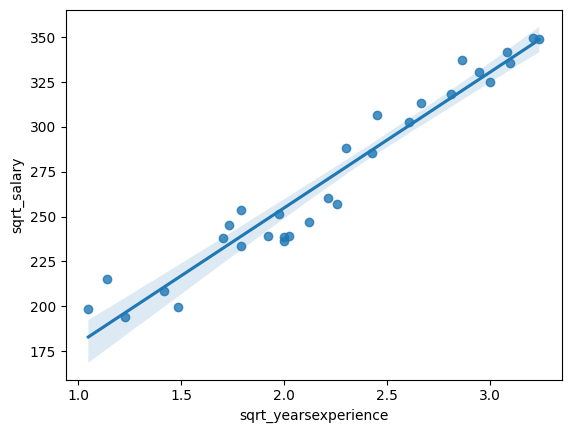

In [58]:
sns.regplot(x=df['sqrt_yearsexperience'],y=df['sqrt_salary'])

In [59]:
# There is high positive relation between both columns

In [66]:
# model building

In [67]:
model3 = smf.ols('sqrt_salary~sqrt_yearsexperience', data=df).fit()
model3

In [68]:
# here model is ready

In [69]:
model3.params

Intercept               103.568031
sqrt_yearsexperience     75.626932
dtype: float64

In [70]:
# checking pvalue

In [71]:
model3.pvalues

Intercept               4.141645e-13
sqrt_yearsexperience    7.584326e-19
dtype: float64

In [72]:
# here pvalue < alpha(0.05), so we are rejecting Null hypothesis. i.e. m=0

In [73]:
# chekcing for r2 value

In [75]:
model3.rsquared

0.9419490138976825

In [76]:
# Our model has 94% accuracy

In [77]:
# Predicting Salary hike based on years of experience

In [78]:
test = pd.DataFrame({
    'sqrt_yearsexperience' : [round(random.uniform(1, 15), 1) for _ in range(30)]
})
test

,sqrt_yearsexperience
0,4.1
1,5.5
2,8.4
3,13.0
4,13.9
5,12.8
6,6.5
7,12.5
8,12.2
9,4.1


In [84]:
df['m3_predicted_salary'] = model.predict(test)
df

,YearsExperience,Salary,m1_predicted_salary,log_yearsexperience,log_salary,m2_predicted_salary,sqrt_yearsexperience,sqrt_salary,m3_predicted_salary
0,1.1,39343.0,90051.943985,0.095310,10.580073,11.396012,1.048809,198.350700,413.638451
1,1.3,46205.0,121236.819645,0.262364,10.740843,15.443052,1.140175,214.953483,519.516156
2,1.5,37731.0,123126.812110,0.405465,10.538237,16.229976,1.224745,194.244691,738.834259
3,2.0,43525.0,45637.121074,0.693147,10.681091,13.588158,1.414214,208.626460,1086.718145
4,2.2,39891.0,56032.079627,0.788457,10.593906,11.283594,1.483240,199.727314,1154.782384
5,2.9,56642.0,59812.064556,1.064711,10.944506,17.185527,1.702939,237.995798,1071.592759
6,3.0,60150.0,159036.668931,1.098612,11.004597,14.543709,1.732051,245.254969,595.143088
7,3.2,54445.0,101391.898770,1.163151,10.904946,12.463981,1.788854,233.334524,1048.904679
8,3.2,64445.0,155256.684003,1.163151,11.073567,12.463981,1.788854,253.860198,1026.216600
9,3.7,57189.0,118401.830949,1.308333,10.954117,16.286185,1.923538,239.142217,413.638451


In [80]:
# We can see that as the Years of Experience increases Salary of employee also increases

In [81]:
# checking for MSE and RMSE values

In [85]:
predicted_values = df['m3_predicted_salary']
MSE_model3 = mean_squared_error(df['Salary'], predicted_values)
RMSE_model3 = np.sqrt(MSE_model2)
print('MSE Of Model 3 = ', MSE_model3, '\nRMSE of Model 3 = ', RMSE_model3)

MSE Of Model 3 =  6383698484.654802 
RMSE of Model 3 =  80626.4577426746


In [87]:
print('MSE Of Model 1 = ', MSE_model1, 'RMSE of Model 1 = ', RMSE_model1)
print('MSE Of Model 2 = ', MSE_model2, 'RMSE of Model 2 = ', RMSE_model2)
print('MSE Of Model 3 = ', MSE_model3, 'RMSE of Model 3 = ', RMSE_model3)

MSE Of Model 1 =  2315107315.7658086 RMSE of Model 1 =  48115.56209549888
MSE Of Model 2 =  6500625688.131293 RMSE of Model 2 =  80626.4577426746
MSE Of Model 3 =  6383698484.654802 RMSE of Model 3 =  80626.4577426746
